# Baseline Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./combined_stats.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           313 non-null    object 
 1   Team           313 non-null    object 
 2   Home/Away      313 non-null    object 
 3   Opp            313 non-null    object 
 4   W/L            313 non-null    object 
 5   MP/Game        313 non-null    int64  
 6   FG             313 non-null    int64  
 7   FGA            313 non-null    int64  
 8   FG%            313 non-null    float64
 9   3P             313 non-null    int64  
 10  3PA            313 non-null    int64  
 11  3P%            313 non-null    float64
 12  FT             313 non-null    int64  
 13  FTA            313 non-null    int64  
 14  FT%            313 non-null    float64
 15  ORB            313 non-null    int64  
 16  DRB            313 non-null    int64  
 17  TRB            313 non-null    int64  
 18  AST       

Check for missing values

In [2]:
df.isna().value_counts()    

Date   Team   Home/Away  Opp    W/L    MP/Game  FG     FGA    FG%    3P     3PA    3P%    FT     FTA    FT%    ORB    DRB    TRB    AST    STL    BLK    TOV    PF     PTS    GmSc   +/-    Opp_W/L%  Opp_PS/G  Opp_Rating  Season  Tot_Games_Sn  Games_Started  MP/Season  PER    TS%    3PAr   FTr    ORB%   DRB%   TRB%   AST%   STL%   BLK%   TOV%   USG%   OWS    DWS    WS     WS/48  OBPM   DBPM   BPM    ValORP
False  False  False      False  False  False    False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False     False     False       False   False         False          False      False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False     313
Name: count, dtype: int64

Convert categorical variables

In [3]:
categorical_columns = df[['Team', 'Opp','W/L', 'Season']]
categorical_columns

,Team,Opp,W/L,Season
0,NYK,ATL,L,2022-23
1,NYK,ATL,W,2022-23
2,NYK,ATL,L,2022-23
3,NYK,ATL,W,2022-23
4,NYK,ATL,W,2023-24
...,...,...,...,...
308,NYK,WAS,W,2023-24
309,NYK,WAS,W,2023-24
310,DAL,WAS,W,2020-21
311,DAL,WAS,L,2021-22


## Feature Engineering


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           313 non-null    object 
 1   Team           313 non-null    object 
 2   Home/Away      313 non-null    object 
 3   Opp            313 non-null    object 
 4   W/L            313 non-null    object 
 5   MP/Game        313 non-null    int64  
 6   FG             313 non-null    int64  
 7   FGA            313 non-null    int64  
 8   FG%            313 non-null    float64
 9   3P             313 non-null    int64  
 10  3PA            313 non-null    int64  
 11  3P%            313 non-null    float64
 12  FT             313 non-null    int64  
 13  FTA            313 non-null    int64  
 14  FT%            313 non-null    float64
 15  ORB            313 non-null    int64  
 16  DRB            313 non-null    int64  
 17  TRB            313 non-null    int64  
 18  AST       

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

Creating a custom function to extract datetime features

In [48]:
def extract_datetime_features(df, column_name):
    df[column_name] = pd.to_datetime(df[column_name])
    df[column_name + '_year'] = df[column_name].dt.year.astype(int)
    df[column_name + '_month'] = df[column_name].dt.month.astype(int)
    df[column_name + '_day'] = df[column_name].dt.day.astype(int)
    return df.drop(columns=[column_name], axis=1)



Creating a function transformer to apply the custom function to the 'Date' column

In [49]:
datetime_transformer = FunctionTransformer(extract_datetime_features, kw_args={'column_name': 'Date'})

In [50]:
 # Get numerical and categorical features, excluding Date and PTS
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features = [col for col in numerical_features if col not in ['PTS']]

categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features = [col for col in categorical_features if col != 'Date']

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

Numerical features: ['MP/Game', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GmSc', '+/-', 'Opp_W/L%', 'Opp_PS/G', 'Opp_Rating', 'Tot_Games_Sn', 'Games_Started', 'MP/Season', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'ValORP']
Categorical features: ['Team', 'Home/Away', 'Opp', 'W/L', 'Season']


In [51]:
df['Date']

0     2022-11-02
1     2022-12-07
2     2023-01-20
3     2023-02-15
4     2023-10-27
         ...    
308   2024-01-06
309   2024-01-18
310   2021-04-03
311   2021-11-27
312   2022-04-01
Name: Date, Length: 313, dtype: datetime64[ns]

In [52]:
preprocessor = ColumnTransformer(
    transformers=[
        ('datetime', datetime_transformer, ['Date']),
        ('ohe', OneHotEncoder(sparse=False), categorical_features),
        ('scaler', StandardScaler(), numerical_features)
    ], 
    remainder='passthrough'
)

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectKBest, f_regression

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_regression, k=10)),
    ('estimator', Ridge())])


## Train-Test Split

In [54]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['PTS'])
y = df['PTS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [55]:
print(X_train.shape)
print(X_test.shape)


(234, 52)
(79, 52)


## Grid Search Cross Validation

In [56]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'estimator__alpha': [0.01, 0.1, 1, 10, 100],
    'estimator__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga']
}

grid_search = GridSearchCV(pipeline,
                           param_grid, 
                           cv=5, 
                           scoring='r2')

## Fit the pipeline

In [57]:
grid_search.fit(X_train, y_train)



/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/pr

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('datetime',
                                                                         FunctionTransformer(func=<function extract_datetime_features at 0x12058b6a0>,
                                                                                             kw_args={'column_name': 'Date'}),
                                                                         ['Date']),
                                                                        ('ohe',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['Team',
                                                                          'Home/Away',
                                                                          'Opp',
                                                                          'W/L',
                                                                          'Season']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         [...
                                                                          '+/-',
                                                                          'Opp_W/L%',
                                                                          'Opp_PS/G',
                                                                          'Opp_Rating',
                                                                          'Tot_Games_Sn',
                                                                          'Games_Started',
                                                                          'MP/Season',
                                                                          'PER',
                                                                          'TS%',
                                                                          '3PAr',
                                                                          'FTr', ...])])),
                                       ('feature_selection',
                                        SelectKBest(score_func=<function f_regression at 0x11e784d60>)),
                                       ('estimator', Ridge())]),
             param_grid={'estimator__alpha': [0.01, 0.1, 1, 10, 100],
                         'estimator__solver': ['auto', 'svd', 'cholesky',
                                               'lsqr', 'sag', 'saga']},
             scoring='r2')

In [58]:
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters found: {'estimator__alpha': 0.01, 'estimator__solver': 'sag'}
Best cross-validation score: 0.9970241547080265


In [61]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_


# Predict on the best model

In [63]:
y_pred = best_model.predict(X_test)

In [65]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# R2 Score
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R2 Score: 0.9960352484229058
Mean Squared Error: 1.5199628924635598


# Interpreting the Model

In [68]:
feature_importance = best_model.named_steps['estimator'].coef_
feature_importance


array([  1.56157913,   9.50036362,  11.9588595 ,  -0.82358991,
         2.38648669,  -1.0953627 ,   8.18063035, -10.68421135,
       -14.50603429,  17.48920257])

In [70]:
feature_selector = grid_search.best_estimator_.named_steps['feature_selection']

In [77]:
temp_preprocessor = preprocessor.fit(X_train)

# Now get feature names
feature_names = []

# Add datetime feature names
feature_names.extend(['Date_year', 'Date_month', 'Date_day'])

# Add one-hot encoded feature names
ohe = temp_preprocessor.named_transformers_['ohe']
categorical_feature_names = ohe.get_feature_names_out(categorical_features)
feature_names.extend(categorical_feature_names)

# Add numerical feature names
feature_names.extend(numerical_features)

/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [78]:
# Get the mask of selected features
selected_mask = feature_selector.get_support()

# Get the scores_ attribute which shows how each feature scored
feature_scores = feature_selector.scores_

# Get the pvalues_ attribute if you used f_regression or chi2
feature_pvalues = feature_selector.pvalues_

# Create a DataFrame to see which features were selected
feature_selection_df = pd.DataFrame({
    'Feature': feature_names,
    'Selected': selected_mask,
    'Score': feature_scores,
    'P-Value': feature_pvalues
})

print("Selected Features:")
print(feature_selection_df[feature_selection_df['Selected']].sort_values('Score', ascending=False))

Selected Features:
    Feature  Selected         Score        P-Value
62     GmSc      True  10117.173637  2.461257e-193
46      FGA      True   4027.967526  1.306948e-148
45       FG      True   2669.975761  2.889268e-129
44  MP/Game      True   2114.639545  1.465397e-118
52      FTA      True   1709.540193  5.220783e-109
49      3PA      True   1661.407427  9.619371e-108
51       FT      True   1630.598932  6.458211e-107
48       3P      True   1447.109821  1.091818e-101
57      AST      True   1367.129230   3.151837e-99
56      TRB      True   1234.223596   7.467335e-95


The Model Identified the Following Features as the most important for predicting points scored in a game:
- Game Score
- Field Goal Attempted in a Game
- Field Goals in a Game
- Minutes Played Per Game
- Free Throws Attempted in a Game
- 3-Pointers Attempted in a Game
- Free Throws in a Game
- 3-Pointers in a Game
- Number of Assists in a Game
- Total Rebounds in a Game

In [81]:
imp_features = df[['GmSc', 'FGA', 'FG', 'MP/Game', 'FTA', '3PA', 'FT', '3P', 'AST', 'TRB', 'PTS']]
imp_features.corr()


,GmSc,FGA,FG,MP/Game,FTA,3PA,FT,3P,AST,TRB,PTS
GmSc,1.000000,0.968983,0.973369,0.949057,0.956429,0.954583,0.955211,0.950656,0.950298,0.942291,0.986752
FGA,0.968983,1.000000,0.986812,0.972957,0.973273,0.976469,0.972133,0.969195,0.969440,0.964552,0.972962
FG,0.973369,0.986812,1.000000,0.962867,0.989232,0.993508,0.989622,0.992806,0.989033,0.988894,0.957249
MP/Game,0.949057,0.972957,0.962867,1.000000,0.955429,0.952520,0.953359,0.946561,0.953150,0.945926,0.949050
FTA,0.956429,0.973273,0.989232,0.955429,1.000000,0.991492,0.999291,0.991381,0.989484,0.990215,0.936140
3PA,0.954583,0.976469,0.993508,0.952520,0.991492,1.000000,0.992485,0.998105,0.992650,0.992745,0.933247
FT,0.955211,0.972133,0.989622,0.953359,0.999291,0.992485,1.000000,0.992943,0.991023,0.991822,0.932888
3P,0.950656,0.969195,0.992806,0.946561,0.991381,0.998105,0.992943,1.000000,0.993822,0.995499,0.923974
AST,0.950298,0.969440,0.989033,0.953150,0.989484,0.992650,0.991023,0.993822,1.000000,0.992645,0.919422
TRB,0.942291,0.964552,0.988894,0.945926,0.990215,0.992745,0.991822,0.995499,0.992645,1.000000,0.912337


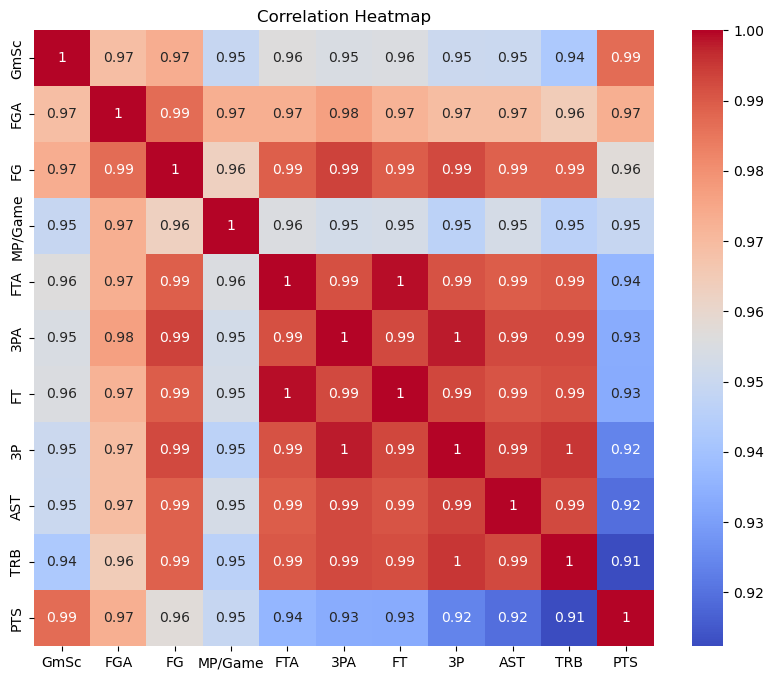

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(imp_features.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

From the beginning we knew that the features we are working with are highly correlated with each other. Multicollinarity is difficult to avoid in this dataset. 

## Trying the same model without the Feature Selector

In [83]:
pipeline_2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', Ridge())])




param_grid_2 = {
    'estimator__alpha': [0.01, 0.1, 1, 10, 100],
    'estimator__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga']
}

grid_search_2 = GridSearchCV(pipeline_2,
                           param_grid_2, 
                           cv=5, 
                           scoring='r2')

grid_search_2.fit(X_train, y_train)

print("Best parameters found:", grid_search_2.best_params_)
print("Best cross-validation score:", grid_search_2.best_score_)


/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/pr

Best parameters found: {'estimator__alpha': 0.01, 'estimator__solver': 'svd'}
Best cross-validation score: 0.9999863127405199


/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [86]:
best_params = grid_search_2.best_params_
best_score = grid_search_2.best_score_
best_model = grid_search_2.best_estimator_


In [87]:
y_pred = best_model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R2 Score: 0.999989575994099
Mean Squared Error: 0.003996240836834321


this model has a much smaller MSE than the previous model and a higher r2 score. 

In [91]:
preprocessed_features = grid_search_2.best_estimator_.named_steps['preprocessor']

# Get the mask of selected features
coefficients = grid_search_2.best_estimator_.named_steps['estimator'].coef_

# Create a DataFrame with features and their coefficients
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute coefficient value to see most important features
print("Feature Importance:")
print(feature_importance_df.reindex(feature_importance_df.Coefficient.abs().sort_values(ascending=False).index).head(10))

Feature Importance:
   Feature  Coefficient
58     STL   -16.641158
60     TOV    16.508039
62    GmSc    15.438271
45      FG    14.670578
57     AST   -11.566850
59     BLK   -10.634042
48      3P    10.592774
46     FGA    10.328271
54     ORB    -8.299109
61      PF     6.464380


This model identies the most important features as:
- Steals in a Game
- Turnovers in a Game
- Game Score
- Field Goals in a Game
- Assists in a Game
- Blocks in a Game
- 3-Pointers in a Game
- Field Goals Attempted in a Game
- Offensive Rebounds in a Game
- Personal Fouls in a Game



/var/folders/rj/3yvmqxnj3d17zpgh8wpywxvr0000gn/T/ipykernel_7660/1261096526.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Feature',


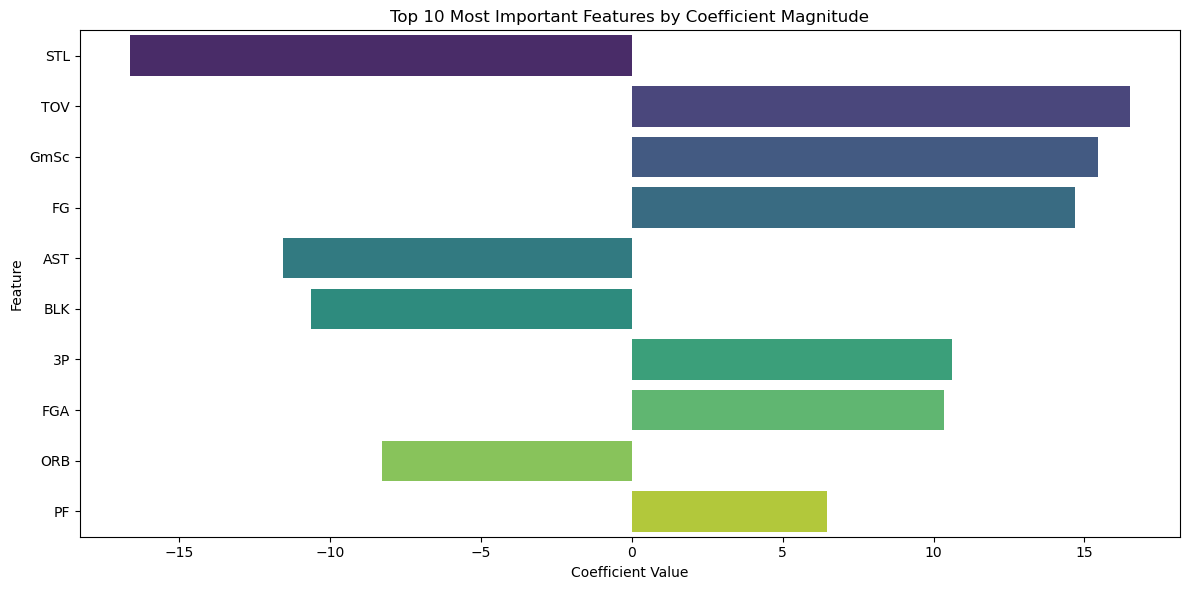

In [95]:
import matplotlib.pyplot as plt
top_10_features = feature_importance_df.reindex(feature_importance_df.Coefficient.abs().sort_values(ascending=False).index).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y='Feature', 
         x='Coefficient', 
         data=top_10_features,
         palette='viridis')

plt.title('Top 10 Most Important Features by Coefficient Magnitude')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()